# 911 Calls Capstone Project - Solutions

For this project, I analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).Being an exploratory analysis to better understand how emergency calls behave, where we can also answer where we should place facilities to better respond to these emergency calls.

The data contains the following fields:

    → lat : String variable, Latitude 
    → lng: String variable, Longitude 
    → desc: String variable, Description of the Emergency Call
    → zip: String variable, Zipcode
    → title: String variable, Title
    → timeStamp: String variable, YYYY-MM-DD HH:MM:SS
    → twp: String variable, Township
    → addr: String variable, Address
    → e: String variable, Dummy variable (always 1)

However, I made some changes to the dataset to try to fix it with python, so I put some letters at the end of the values in the lat and lng columns, added some empty rows and columns.

____
### Setup 

** Importing libraries that will be used ** 

In [1]:
import pandas as pd
import numpy as np

** Importing visualization libraries **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # change the general style of the plots (just because I like this one :) )
import io
from PIL import Image
from IPython import display
import cufflinks as cf
cf.go_offline()

# Displays output inline
%matplotlib inline 

____
### Loading the data

** Loading the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911_edit.csv', sep=';') # This file is too big to put on Github, so if you want it let me know
df.head(3)

lat            lng  \
0    40,2978759  -75,5812935nn   
1  40,2580614nn    -75,2646799   
2    40,1211818    -75,3519752   

                                                desc      zip  \
0  REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   

                     title         timeStamp                twp  \
0   EMS: BACK PAINS/INJURY  10/12/2015 17:40        NEW HANOVER   
1  EMS: DIABETIC EMERGENCY  10/12/2015 17:40  HATFIELD TOWNSHIP   
2      Fire: GAS-ODOR/LEAK  10/12/2015 17:40         NORRISTOWN   

                         addr    e  Coluna1  Coluna2  Coluna3  
0      REINDEER CT & DEAD END  1.0      NaN      NaN      NaN  
1  BRIAR PATH & WHITEMARSH LN  1.0      NaN      NaN      NaN  
2                    HAWS AVE  1.0      NaN      NaN      NaN

There are some letter at the end of values columns in the lat and lng that need to be removed. Also there are three empty columns which aren't nedded

____
### Pre-processing 

In [4]:
# removing null collumns
df.dropna(axis=1, how="all",inplace=True) # parameter HOW because we want to remove columns that ALL values are null
print(df.columns)

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [5]:
# seeing if there are empty rows
df['lat'].isnull().value_counts()

False    99492
True        17
Name: lat, dtype: int64

In [6]:
# removing null rows
df.dropna(axis=0, how='all', inplace=True)
df['lat'].isnull().value_counts()

False    99492
Name: lat, dtype: int64

#### Function

In [7]:
# fix the letters in the lat and lng columns
def remove_nn(value):
    
    if type(value) is str:
        return value.replace('n','')
    else:
        return value

# test
remove_nn("406030nn")

'406030'

In [8]:
# apply in the collumns
df['lat'] = df['lat'].apply(remove_nn)
df['lng'] = df['lng'].apply(remove_nn)
df.head(5)

lat          lng                                               desc  \
0  40,2978759  -75,5812935  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40,2580614  -75,2646799  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40,1211818  -75,3519752  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3   40,116153   -75,343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4   40,251492  -75,6033497  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title         timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  10/12/2015 17:40        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  10/12/2015 17:40  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  10/12/2015 17:40         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  10/12/2015 17:40         NORRISTOWN   
4      NaN           EMS: DIZZINESS  10/12/2015 17:40   LOWER POTTSGROVE   

                         addr    e  
0      REINDEER CT & DEAD END  1.0  
1  BRIAR PATH & WHITEMARSH LN  1.0  
2                    HAWS AVE  1.0  
3          AIRY ST & SWEDE ST  1.0  
4    CHERRYWOOD CT & DEAD END  1.0

In [9]:
# The changes that I made broke the timeStamp column, so I will replace the column of this dataframe with the original one
df_or = pd.read_csv("911.csv")
df_or.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [10]:
df['timeStamp'] = df_or['timeStamp']
df.head()

lat          lng                                               desc  \
0  40,2978759  -75,5812935  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40,2580614  -75,2646799  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40,1211818  -75,3519752  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3   40,116153   -75,343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4   40,251492  -75,6033497  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr    e  
0      REINDEER CT & DEAD END  1.0  
1  BRIAR PATH & WHITEMARSH LN  1.0  
2                    HAWS AVE  1.0  
3          AIRY ST & SWEDE ST  1.0  
4    CHERRYWOOD CT & DEAD END  1.0

** Check the info() of the df **

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 99508
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  object 
 1   lng        99492 non-null  object 
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  float64
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [12]:
# Converting the lat and lng to float
""" obs: My excel is in Portuguese so when I changed the values in the first two columns, 
the decimal separator changed. So I needed to switch to """

df['lat'] = df['lat'].str.replace(',','.').astype(float)
df['lng'] = df['lng'].str.replace(',','.').astype(float)

# Converting "e" column to int64 (just to be the same as the original dataset)
df['e'] = df['e'].astype('int64')

In [13]:
# See the type of "timeStamp" column
type(df['timeStamp'].iloc[0])

str

In [14]:
# We can't work with data in str type, so it's necessary to convert the timeStamp colum to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0]) # now we can manipulate dates and times

# Work with timeStamp becomes possible grab specific attributes from a Datetime object by calling them (date, hour, year...)

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 99508
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 7.6+ MB


In [17]:
# Removing outliers 
# We have 3 latitudes that are very different from the other values, indicating that they are not from the same region
df.lat.sort_values() 

67120    30.333596
25726    32.387090
57273    39.745533
88516    39.745533
75249    39.956497
           ...    
13604    40.584929
57577    40.584929
71621    40.584929
7761     40.584929
8378     41.167156
Name: lat, Length: 99492, dtype: float64

In [18]:
df.lng.sort_values() 

67120   -95.595595
25726   -86.276106
57273   -84.395256
88516   -84.395256
63388   -77.686813
           ...    
48628   -75.012379
11295   -75.008877
52019   -75.008041
1528    -75.000755
52063   -74.995041
Name: lng, Length: 99492, dtype: float64

In [19]:
df.drop([67120,25726,8378], inplace=True) # Removing by index that we can see above

Thus, the pre-processing step ends here

___
## Analytics

** Find the top 5 zipcodes for 911 calls **

In [20]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **  

In Brazil, we doesn't have this kind of division so it was a little strange for me. I assumed it's like cities (many quotes hahah)

In [21]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique title codes **

To see how many kinds of emergency kinds are in the dataset

In [22]:
df['title'].nunique()

110

### Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code **

In [23]:
# Create a new column called "Reason" that contains only the title code **
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [24]:
reason_count = df['Reason'].value_counts()
reason_count_p = df['Reason'].value_counts(normalize=True)
pd.concat([reason_count, round(reason_count_p,2)], axis=1, keys=['count', 'percentage'])

count  percentage
EMS      48875        0.49
Traffic  35694        0.36
Fire     14920        0.15

We can see that the dataset has three categories EMS, Fire, and Traffic. 

Also, the most common emergency is EMS (almost 50% of the cases) which is a emergency services that provide urgent pre-hospital treatment and stabilisation for serious illness and injuries and transport to definitive care. It is important to note that this classification can be confused with "Traffic" and vice versa.

** Using seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

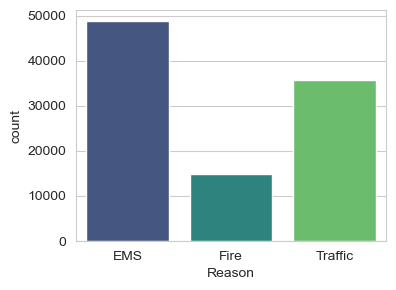

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(x='Reason',data=df,palette='viridis')

___
** To focues in time information, I created 3 new columns called Hour, Month, and Day of Week to understand the distribution and whether there are any patterns **

In [26]:
# using the lambda function as it is a simple and punctual function

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year']= df['timeStamp'].apply(lambda time: time.year)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   

                         addr  e Reason  Hour  Month  Year  Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12  2015            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12  2015            3

** The Day of Week is an integer 0-6. So using the .map() with a dictionary to map the actual string names to the day of the week: **

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   

                         addr  e Reason  Hour  Month  Year Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12  2015         Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12  2015         Thu

In [29]:
print(f"Min. Date: {df['timeStamp'].min()}")
print(f"Max. Date: {df['timeStamp'].max()}")

Min. Date: 2015-12-10 14:39:21
Max. Date: 2016-08-25 19:10:15


** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

Day of Week
Tue    15057
Wed    15043
Fri    14763
Thu    14679
Mon    14625
Sat    13236
Sun    12086
Name: Reason, dtype: int64


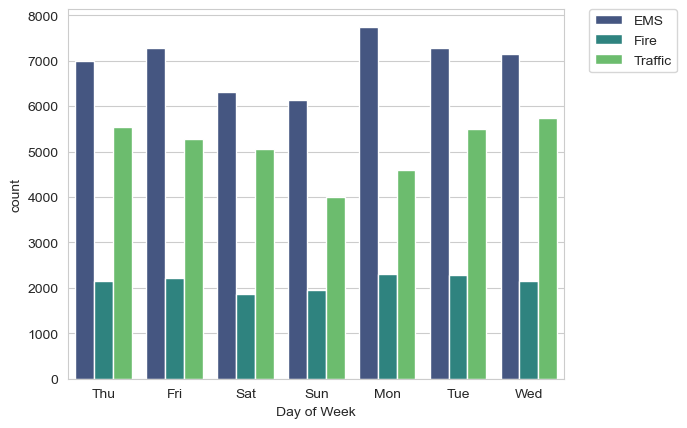

In [30]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis', )
print(df.groupby('Day of Week')['Reason'].count().sort_values(ascending=False))

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

So Tuesday was the Day of Week which had more Emergency Calls, followed by Wednesday. Other point is that Fire was almost constant. When we look to Traffic, we can see an interessant patern, where Sunday had the smaller frequency which could be explain by the caracteristic about the day, because people don't go out a lot in Sunday. 

** Now do the same for Month:**

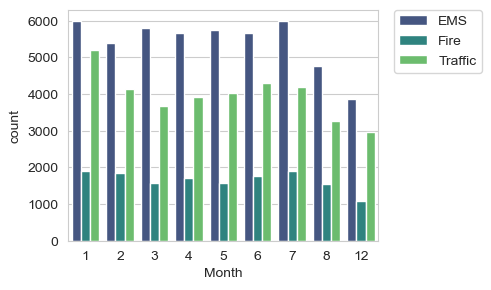

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

January was the month with the most emergency calls, followed by July and June.

##### For some reason, it is missing some months ->  9,10, and 11 are not there

** We can fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months **

In [32]:
byMonth = df.groupby('Month').count()
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13095  13095  13095  11421  13095      13095  13094  12986  13095   
2      11395  11395  11395   9861  11395      11395  11393  11324  11395   
3      11059  11059  11059   9737  11059      11059  11050  11018  11059   
4      11287  11287  11287   9856  11287      11287  11284  11244  11287   
5      11374  11374  11374   9914  11374      11374  11371  11330  11374   

       Reason   Hour   Year  Day of Week  
Month                                     
1       13095  13095  13095        13095  
2       11395  11395  11395        11395  
3       11059  11059  11059        11059  
4       11287  11287  11287        11287  
5       11374  11374  11374        11374

** Now we can create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

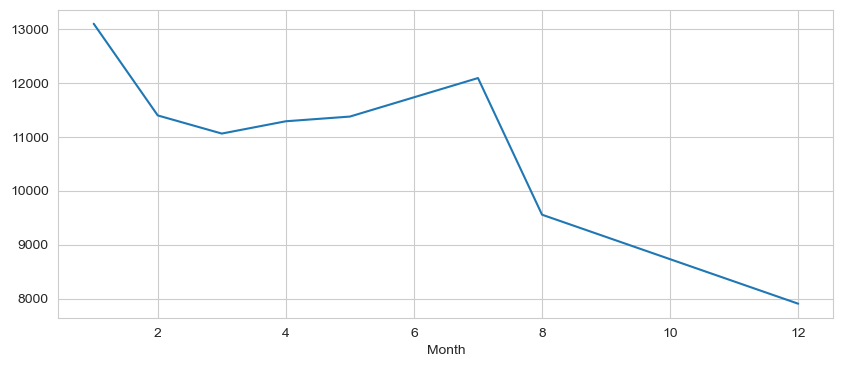

In [33]:
plt.figure(figsize=(10,4))
byMonth['Reason'].plot()

Although we do not have data for months 9, 10 and 11, it is likely that it followed the trend shown in the graph above.

** Using seaborn lmplot() to create a linear fit on the number of calls per month, i.e., see the regression line **

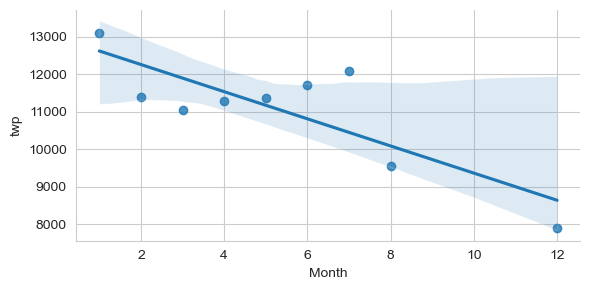

In [34]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index(),height=3, aspect=2) 
# ps: We can use any column to do the plot, because is a counting in y axis and the values are close of one another

So, as I said before and looking at the regression line above, we were able to at least get an idea of how the data could be in the months that had no data

** Creating a new column called 'Date' that contains the date from the timeStamp column for to see the distribution per date **

In [35]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df['Date'].head(1)

0    2015-12-10
Name: Date, dtype: object

In [36]:
# mean of calls per date
print(f"Mean: {df.groupby('Date')['Reason'].count().mean()}")

# median of calls per date
print(f"Median: {df.groupby('Date')['Reason'].count().median()}")

Mean: 382.65
Median: 381.5


Both calculations were made to understand the data, as we have that the mean is more susceptible to extreme values, so it is normally used when the data are arranged homogeneously. The median is less influenced by very high or very low values. Despite the two values being close, I adopted the median as the standard for the other calculations in order to avoid problems with days that may have connection peaks.

In [37]:
# median of calls per reason
ems_median = df[df['Reason'] == 'EMS'].groupby('Date')['Reason'].count().median()
traffic_median = df[df['Reason'] == 'Traffic'].groupby('Date')['Reason'].count().median()
fire_median = df[df['Reason'] == 'Fire'].groupby('Date')['Reason'].count().median()




print('Median by Date:\n')
print(f"EMS: {ems_median}")
print(f"Traffic: {traffic_median}")
print(f"Fire: {fire_median}")

Median by Date:

EMS: 189.0
Traffic: 134.0
Fire: 56.0


In [38]:
# Top 3 dates with the most numbers of calls
df.groupby('Date')['Reason'].count().sort_values(ascending=False).head(3)

Date
2016-01-23    887
2016-02-24    673
2016-01-24    657
Name: Reason, dtype: int64

** Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls **

I used cufflinks because it's more interactive and helps a lot with graph analysis. However, to be able to see it here on GitHub, I took a print of the graph generated by the commented code, that's why it has Image(filename)

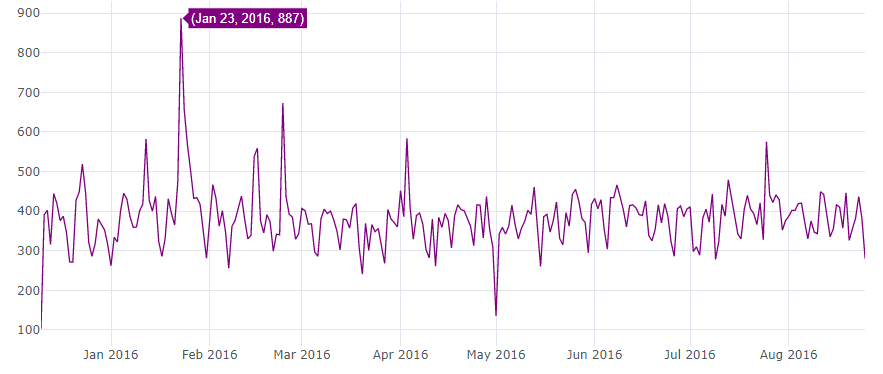

In [39]:
#df.groupby('Date')['Reason'].count().iplot(theme="white", color="purple")
display.Image('all.png')

In [40]:
print(f"\033[1mSo Jan 23, 2016 was {round(((931-384)/384)*100)}% above the median for emergency calls\033[0m")

So Jan 23, 2016 was 142% above the median for emergency calls


We can see that on Jan 23, 2016 there was a spike in emergency calls (931 calls). Researching I found that on the 22nd to the 24th there was an intense blizard in the northeastern of the USA. (https://www.weather.gov/media/lwx/Bliz2016.pdf)

** Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call **   


If exists some correlation with the spike in the Jan 23,2016 with the blizzard probably emergency calls by "Traffic" will be bigger than other Reason, because in blizzards the streets/roads are more dangerous to drive.

Blizzards combine the limited visibility of fog with the slippery roads you can expect from ice and snow. Driving in a blizzard makes it incredibly difficult to see what is going on around you, be seen by other road users and maintain control of your vehicle. (https://www.epermittest.com/drivers-education/driving-blizzard)

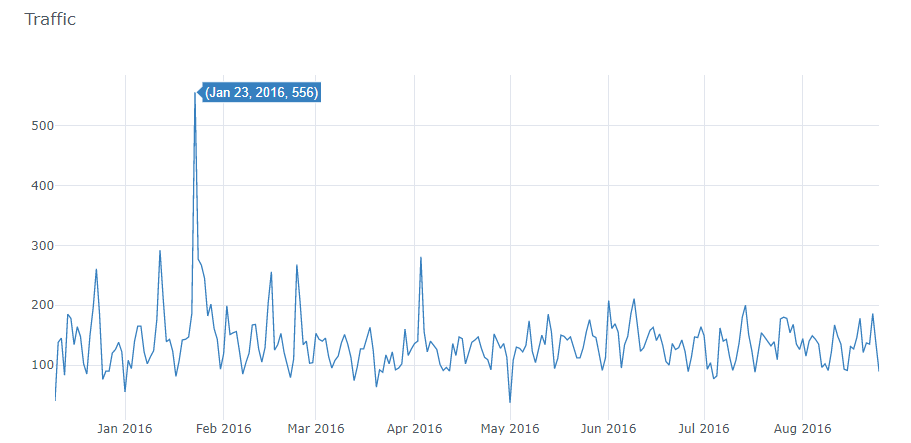

In [41]:
#df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].iplot(title="Traffic",colors="blue",theme='white')
display.Image('traffic_date.png')

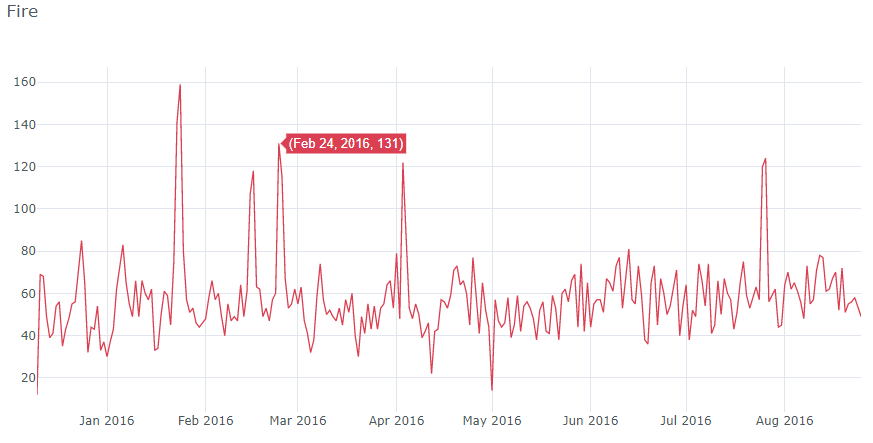

In [42]:
#df[df['Reason']=='Fire'].groupby('Date').count()['twp'].iplot(title="Fire",colors="red",theme='white')
display.Image('fire_date.png')

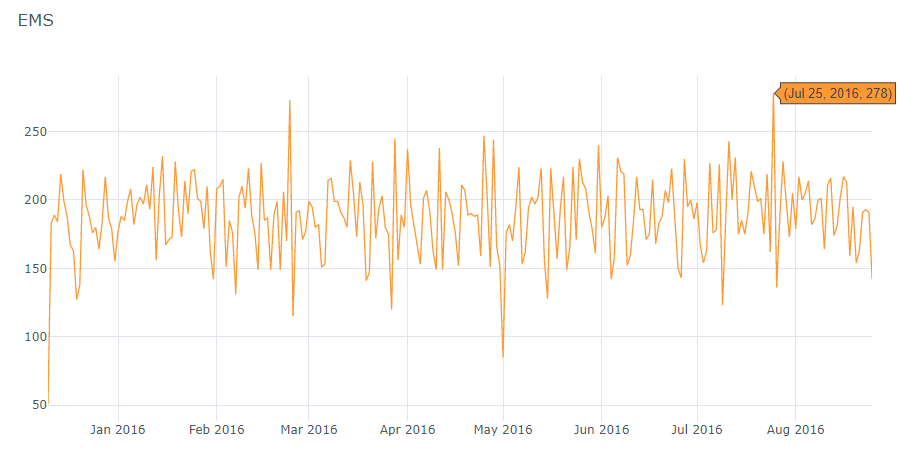

In [43]:
#df[df['Reason']=='EMS'].groupby('Date').count()['twp'].iplot(title="EMS",theme='white')
display.Image('ems_date.png')

___
#### Trying show all 3 graph in just 1

I spent a long time thinking about how to do it and I don't know if the way I did it was the best hahah. So if you know a simple way or another way to do this let me know.

In [44]:
multi_index_df = df.groupby(by=['Date','Reason']).count()['twp']
multi_index_df

Date        Reason 
2015-12-10  EMS         51
            Fire        12
            Traffic     40
2015-12-11  EMS        183
            Fire        69
                      ... 
2016-08-24  Fire        53
            Traffic    136
2016-08-25  EMS        142
            Fire        49
            Traffic     89
Name: twp, Length: 780, dtype: int64

In [45]:
df_graphics = multi_index_df.unstack()
df_graphics.head(3)

Reason      EMS  Fire  Traffic
Date                          
2015-12-10   51    12       40
2015-12-11  183    69      138
2015-12-12  189    68      145

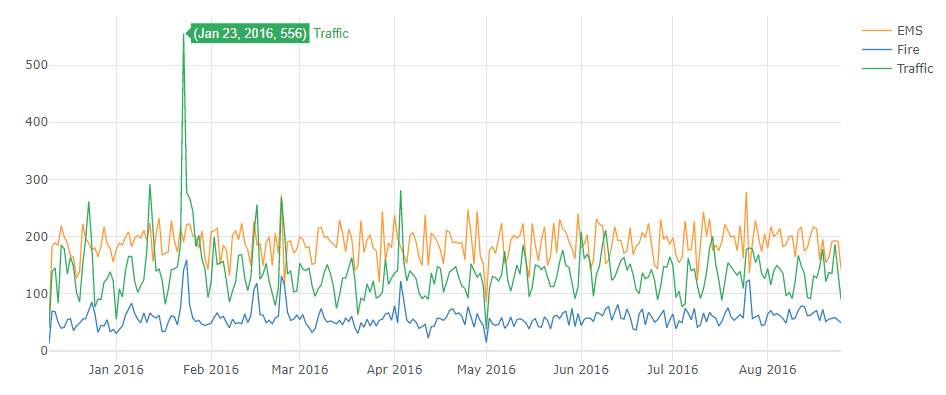

In [46]:
#df_graphics.iplot(theme='white')
display.Image('allinone.png')

In [47]:
# % of Traffic in all emergency calls in 23 Jan,2016 
print(f"{(559/913):.0%}")

# Traffic above median per date
print(f"{((559-traffic_median)/traffic_median):.0%}")

# Fire above median
print(f"{((158-fire_median)/fire_median):.0%}")

61%
317%
182%


__As we can see, the most common type of emergency call on Jan 23, 2016 was "Traffic" (61% of all calls) and that day it was above the daily median in 308%. Another point is that we have a peak in calls of the "Fire" type, going from a daily median of 55 to 158 (an increase of 187%)__

"Traffic" has more spikes and more fluctuations compared to others. 

Finally, we can see that at the beginning of April we have a "stabilization" of the values, that is, they are closer to the medians of each type of emergency call and maintain a more constant behavior

___
Plotly and Cufflinks are great for data visualization. It's possible to separate the graph as a "subplot" in matplot just by adding the parameter (subplots=True), in addition, we can customize it in several ways due to the various parameters that Iplot has

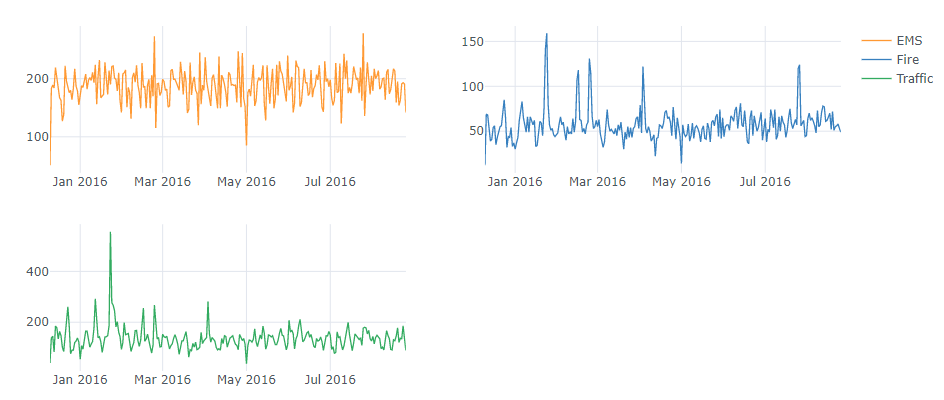

In [48]:
#df_graphics.iplot(subplots=True, theme='white')
display.Image('threegraphs.png')

____
### Heatmaps


#### Day of Week vs Month
** Now creating heatmaps with seaborn and our data. First is needed to restructure the dataframe **

A heatmap is a graphical representation of data where each value of a matrix is represented as a color, this makes it easier to understand the information understanding of the information

In [49]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1950  1564  1521  1949  1725  1646  2042  1308  1058
Mon          1718  1959  1534  1594  1776  1609  1685  1499  1251
Sat          2252  1434  1264  1736  1438  1376  1691  1085   960
Sun          1947  1223  1097  1486  1413  1329  1667  1020   904
Thu          1584  1582  1883  1592  1585  2055  1642  1505  1251
Tue          1961  1743  1871  1421  1904  1671  1650  1602  1234
Wed          1683  1890  1889  1509  1533  2045  1711  1536  1247

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

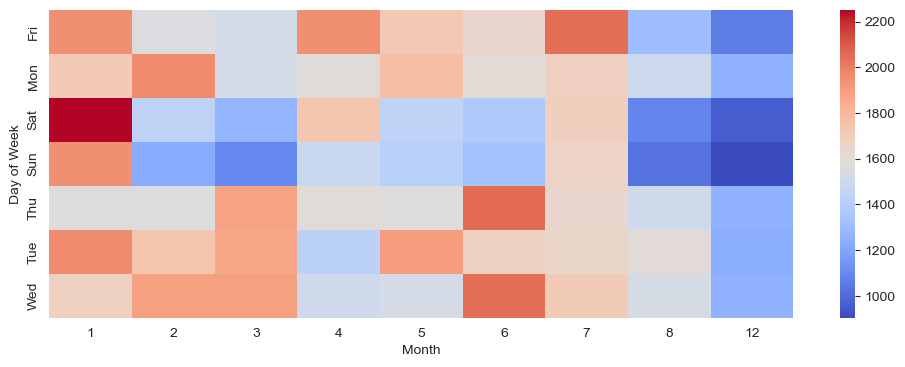

In [50]:
plt.figure(figsize=(12,4))
sns.heatmap(dayMonth,cmap='coolwarm')

When we look at the day of the week by month, Saturdays in January stand out with a high concentration of the number of cases

#### Day of Week vs Hour
** Now repeating these same plots and operations, for a DataFrame that shows the Day of Week vs Hour **

In [51]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Fri          271  227  187  184  201  209  368  635  723  749  ...  927  971   
Mon          280  213  213  182  213  267  404  679  828  795  ...  860  939   
Sat          369  293  257  254  224  243  262  396  479  630  ...  771  800   
Sun          362  316  280  266  233  246  301  408  496  620  ...  692  671   
Thu          283  204  237  163  179  223  386  607  789  848  ...  901  989   
Tue          267  237  184  167  216  252  421  674  884  851  ...  948  941   
Wed          241  221  179  215  154  253  433  728  858  807  ...  927  901   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1036   972  793  720  636  561  518  445  
Mon           964   994  878  732  611  471  463  320  
Sat           813   765  767  703  609  561  498  456  
Sun           668   717  673  648  519  464  388  336  
Thu           935  1034  815  685  610  538  409  350  
Tue          1014  1019  867  722  642  560  434  278  
Wed          1010  1062  882  686  675  564  494  330  

[7 rows x 24 columns]

In [52]:
# top 4 highest occurrences by day and hour
dayHour.unstack().nlargest(4)

Hour  Day of Week
17    Wed            1062
16    Fri            1036
17    Thu            1034
      Tue            1019
dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

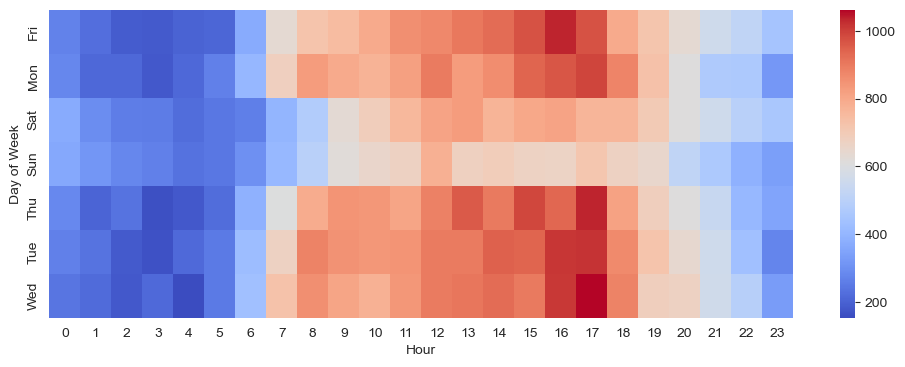

In [53]:
plt.figure(figsize=(12,4))
sns.heatmap(dayHour,cmap='coolwarm')

Here we can see some interesting things. 

* From 8am to 6pm are the times that have the most call records, this can be explained by the fact that it is business hours, that is, it is precisely when there are more people awake and also doing things, so the probability of an emergency happening increases due to of the amount of people.    




* We can highlight that the times with the highest number of occurrences are at 4 pm and 5 pm. On the other hand, the times with the lowest number of occurrences are in the early morning between 2 am and 3 am. 

#### Reason vs Hour
** Now repeating these same plots and operations, for a DataFrame that shows the Reason vs Hour **

In [54]:
hourReason = df.groupby(by=['Reason','Hour']).count()['Date'].unstack()

In [55]:
hourReason.unstack().nlargest(7)

Hour  Reason
17    EMS       3163
16    EMS       3061
15    EMS       3000
14    EMS       2988
12    EMS       2978
13    EMS       2914
18    EMS       2739
dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='Reason'>

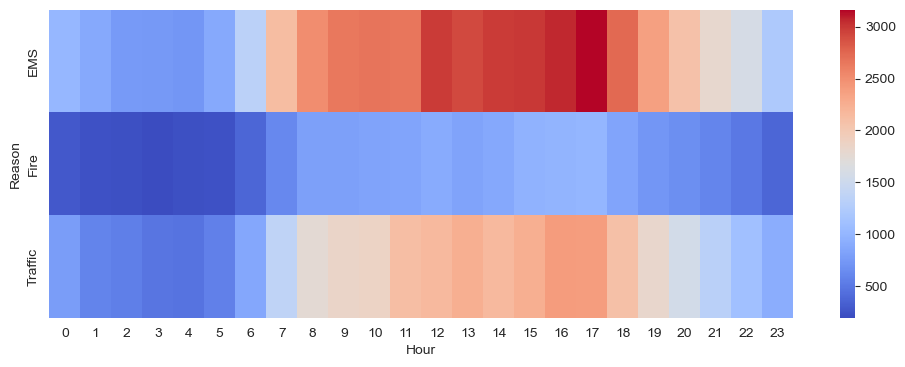

In [56]:
plt.figure(figsize=(12,4))
sns.heatmap(hourReason,cmap='coolwarm')

Here we can see how occurrences are distributed by time and type. Thus, it is concluded that the values highlighted above (4 pm and 5 pm) come from an emergency call of the 'Traffic' type, which makes sense, since it is the rush hour when there are more people in traffic and who are more tired because of the work routine, so there is a greater probability of accidents of this type.




On the other hand, we can observe that the EMS are more constant occurrences during the day, mainly in the middle of the morning and beginning of the afternoon (I didn't think of any hypothesis for this). EMS as said has a median occurrence higher than the others, so although "Traffic" has much higher peaks, it does not have a median value greater than "EMS"



Finally, we have that occurrences of the "Fire" type are more punctual, so we don't have such outliers, but like the others, they occur more during business hours.




**Abstract: The more people doing day-to-day activities, the greater the chances of having an accident. Be careful :)**

___
### Maps
** I thought it was cool to show a real map of the city to see where the calls come from **


If you want to learn more about this kind of plot: https://www.kaggle.com/code/alexisbcook/interactive-maps#The-data

In [57]:
# Importing libraries 
import folium
import math
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [58]:
# Separating by reason. I wanted to see the case highlighted, that is, 4 p.m. to 5 p.m.
map_traffic = df[(df['Reason'] == 'Traffic') & (df['Hour'].isin(range(16,18)))]

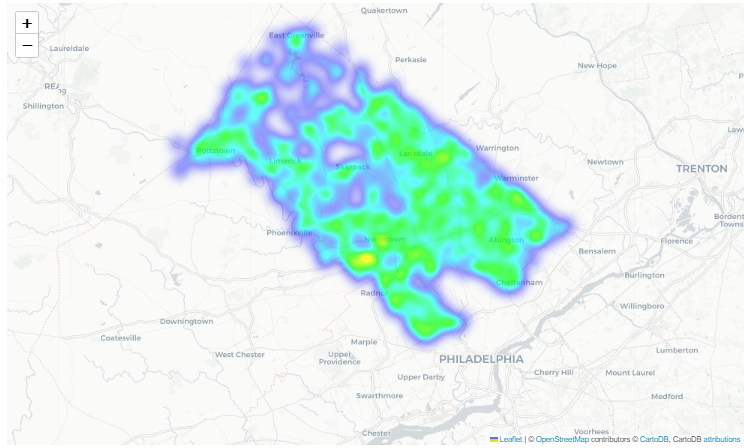

In [59]:
m = folium.Map(location=[40.243821, -75.649367], tiles='cartodbpositron', zoom_start=8)

# Add points to the map
"""mc = MarkerCluster()
for idx, row in map_traffic.iterrows():
    if not math.isnan(row['lng']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lng']]))
m.add_child(mc)"""

# Add a heatmap to the base map
HeatMap(data=map_traffic[['lat', 'lng']], radius=10).add_to(m)

#Display the map
display.Image(filename='heatmap_traffic.png')  #m

Traffic accidents, as expected, occur more in centers and on major highways, mainly at intersections.

___
### Blizzard  (22-24 Jan, 2016)


"The Blizzard of 2016 flooded coastal communities and piled up over 40 inches of snow, with incredible drifts. It set new snowstorm records at New York City and Baltimore."

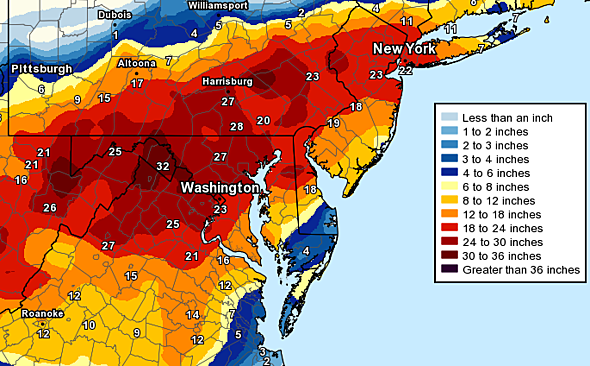

In [60]:
from IPython import display
display.Image("https://cms.accuweather.com/wp-content/uploads/2016/01/590x366_01252031_snownws125as.png" ,width=400, height=500)

In [61]:
blizzard_traffic = df[(df['Reason'] == 'Traffic') & (df['timeStamp'] >= '2016-01-22') & (df['timeStamp'] <= '2016-01-24')]

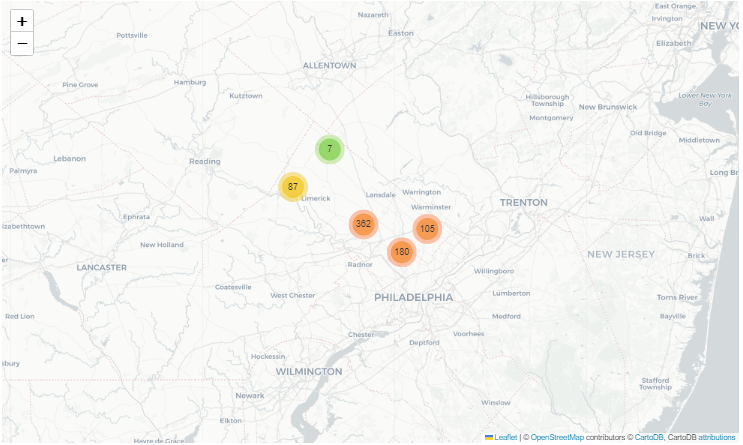

In [62]:
# Create a base map
m_2 = folium.Map(location=[40.243821, -75.649367], tiles='cartodbpositron', zoom_start=8)

# Add points to the map
mcd = MarkerCluster()
for idx, row in blizzard_traffic.iterrows():
    if not math.isnan(row['lng']) and not math.isnan(row['lat']):
        mcd.add_child(Marker([row['lat'], row['lng']]))
m_2.add_child(mcd)

# Display the map
display.Image('blizzard_traffic.png') #m_2

___
Finally, I found interesting to see the EMS, since it is the type of emergency that has the highest frequency, so I limited it to the times with the highest concentration of cases, as seen earlier. The goal was to see if it had any correlation with the location.

In [63]:
EMS = df[(df['Reason'] == 'EMS') & (df['Hour'].isin(range(11,18)))]

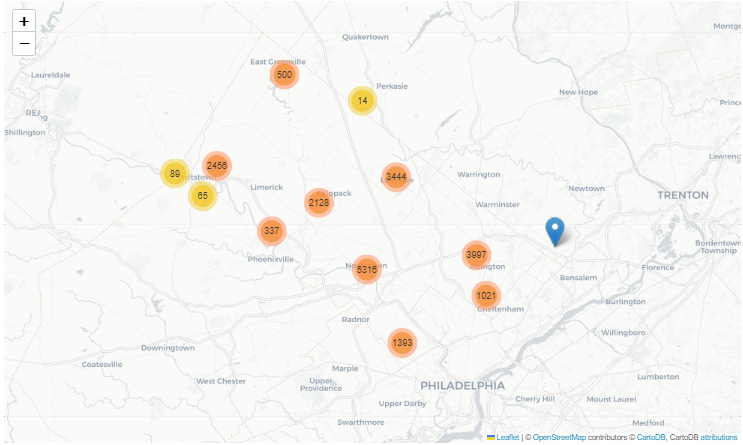

In [64]:
# Create a base map
m_3 = folium.Map(location=[40.243821, -75.649367], tiles='cartodbpositron', zoom_start=8)

# Add points to the map
mcd2 = MarkerCluster()
for idx, row in EMS.iterrows():
    if not math.isnan(row['lng']) and not math.isnan(row['lat']):
        mcd2.add_child(Marker([row['lat'], row['lng']]))
m_3.add_child(mcd2)

# Display the map
display.Image('EMS.png') #m_3

Knowing that there are some concentrations in certain areas we could see several other indicators to understand how the place is or something like that.

Using the website for example: https://www.city-data.com/county/Philadelphia_County-PA.html

___
## Machine Learning Model
I focused on applying the K-Means method using only to the EMS data, since they represent almost 50% of the cases in the entire database.

In [65]:
# Importing
from sklearn.cluster import KMeans

In [66]:
# separating the data from EMS
df_EMS = df[df['Reason'] == 'EMS']
X = df_EMS[['lat','lng']]
X.head()

lat        lng
0  40.297876 -75.581294
1  40.258061 -75.264680
3  40.116153 -75.343513
4  40.251492 -75.603350
5  40.253473 -75.283245

In [67]:
# using elbow method to find the optimum cluster numbers in K-means

sse = []

K = range(2,11)
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

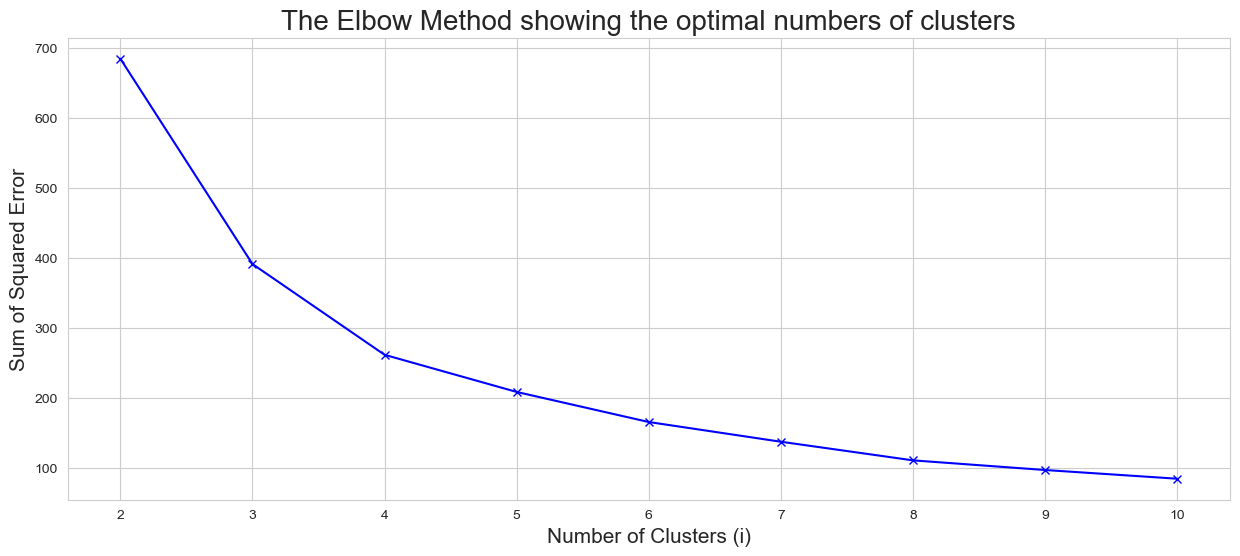

In [68]:
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (i)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal numbers of clusters', fontsize = 20)
plt.show()

It was not very clear to identify the right ‘K’ using the elbow method. So, I used also the Silhouette score

In [69]:
from sklearn.metrics import silhouette_score

X = df_EMS[['lat','lng']]
print("Clusters\tSilhoutte Score\n")
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_cluster, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.49432895139591215
k = 3 	--> 	0.4596900986644844
k = 4 	--> 	0.505550619809182
k = 5 	--> 	0.4800250732790006
k = 6 	--> 	0.4816194321919607
k = 7 	--> 	0.4984803500411124
k = 8 	--> 	0.5016000961943013
k = 9 	--> 	0.49510648074738955
k = 10 	--> 	0.46136006706515775


In the Elbow chart we can see that values above 3 would be a good fit, so in the Silhouette score we had that k = 4 gives the highest Silhouette Score

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
sse.append(kmeans.inertia_)

In [71]:
X['cluster_label'] = kmeans.fit_predict(X)

In [72]:
X.head(3)

lat        lng  cluster_label
0  40.297876 -75.581294              2
1  40.258061 -75.264680              1
3  40.116153 -75.343513              0

In [75]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=[['lat','lng']])
centers

lat        lng
0  40.098978 -75.333746
1  40.249289 -75.312572
2  40.260185 -75.570181
3  40.125895 -75.139225

In [76]:
X['cluster_label'].value_counts()

0    17080
3    12556
2     9753
1     9486
Name: cluster_label, dtype: int64

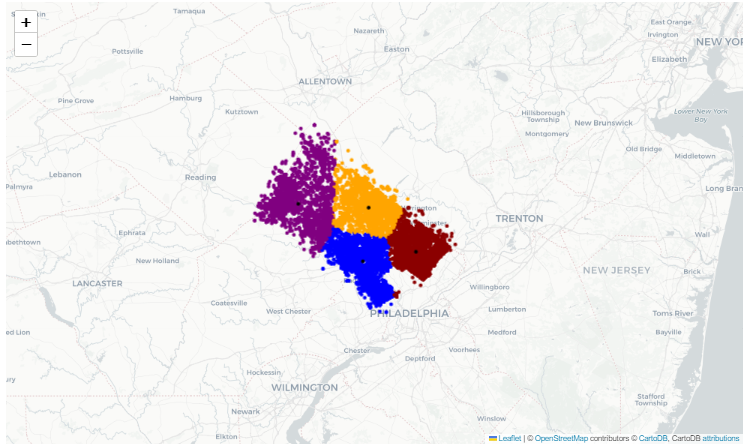

In [80]:
# Create a base map
m_4 = folium.Map(location=[40.243821, -75.649367], tiles='cartodbpositron', zoom_start=8)


def color_producer(val):
    if val == 0:
        return 'blue'
    elif val == 1:
        return 'orange'
    elif val == 2:
        return 'purple'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(X)):
    Circle(
        location=[X.iloc[i]['lat'], X.iloc[i]['lng']],
        radius=20,
        color=color_producer(X.iloc[i]['cluster_label'])).add_to(m_4)
    
for a in range(0,len(centers)):
    Circle(
        location=[centers.iloc[a]['lat'],centers.iloc[a]['lng']],
        radius=30,
        color='black').add_to(m_4)

# Display the map
display.Image('ems_kmeans.png') #m_4

Here we can see how the model clustered the data. The black dots are the centroids, i.e. data points that represent the center of each cluster (the mean) and may not necessarily be a member of the data set.   

 **Therefore, considering only EMS, we must place the facilities to attend these cases close to the centroids to better respond to emergency calls, if there is only a budget for one point, it would be interesting that it was close to the centroid of Cluster 0 (blue), where we have a greater concentration of EMS cases.**


___
# Thanks!

If you've found some english error or something that you want to share, please tell me 